<a href="https://colab.research.google.com/github/hydrationn/Machine-DeepLearning/blob/main/DeepLearning/lab/20240523_%EC%8B%A4%EC%8A%B506_Generative_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Practice 6-1. Fashion MNIST Reconstruction - Autoencoder

In [3]:
# Import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# GPU/CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

cuda


In [5]:
# import dataset

fashion_train = datasets.FashionMNIST("../image_data/FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
fashion_test = datasets.FashionMNIST("../image_data/FashionMNIST", train=False, download=True, transform=transforms.ToTensor())

fashion_train.data = fashion_train.data/255.0
fashion_train.targets = fashion_train.targets
fashion_test.data = fashion_test.data/255.0
fashion_test.targets = fashion_test.targets

100%|██████████| 26421880/26421880 [00:06<00:00, 3961304.28it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270726.60it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4979880.63it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20821867.88it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



tensor(0)


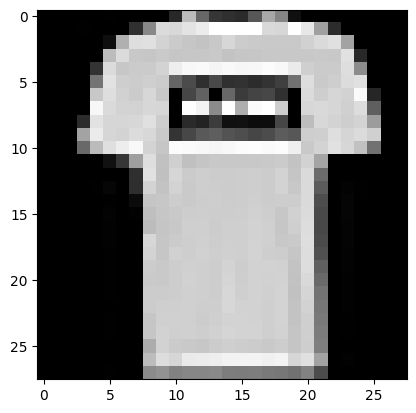

In [7]:
# Import dataset

plt.imshow(fashion_train.data[1], cmap="gray")
print(fashion_train.targets[1])

In [8]:
# Batch generation

batch_size = 256

train_loader = torch.utils.data.DataLoader(fashion_train.data, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = torch.utils.data.DataLoader(fashion_test.data, batch_size=len(fashion_test.data), shuffle=False, drop_last=False)

In [9]:
# Model

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    self.encoder = nn.Linear(784, 16)
    self.decoder = nn.Linear(16, 784)

  def forward(self, x):
    z_vector = self.encoder(x)
    output = self.decoder(z_vector)

    return torch.sigmoid(output)

In [10]:
model = Autoencoder().to(device)

In [25]:
# Parameter, loss function, optimizer

# Hyperparameters

num_epochs = 10
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# Model Train

loss_list = []

for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, images in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)

    images = images.to(device)
    input_image = images.reshape(-1, 28*28)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, input_image)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 0.078340
Epoch 2 Loss 0.040478
Epoch 3 Loss 0.031948
Epoch 4 Loss 0.027047
Epoch 5 Loss 0.023884
Epoch 6 Loss 0.021954
Epoch 7 Loss 0.020769
Epoch 8 Loss 0.020043
Epoch 9 Loss 0.019513
Epoch 10 Loss 0.019107


In [13]:
# Test

for batch_idx, image in enumerate(test_loader):
  with torch.no_grad():
    test_img = image.reshape(-1, 784).to(device)
    test_recon_x = model(test_img)

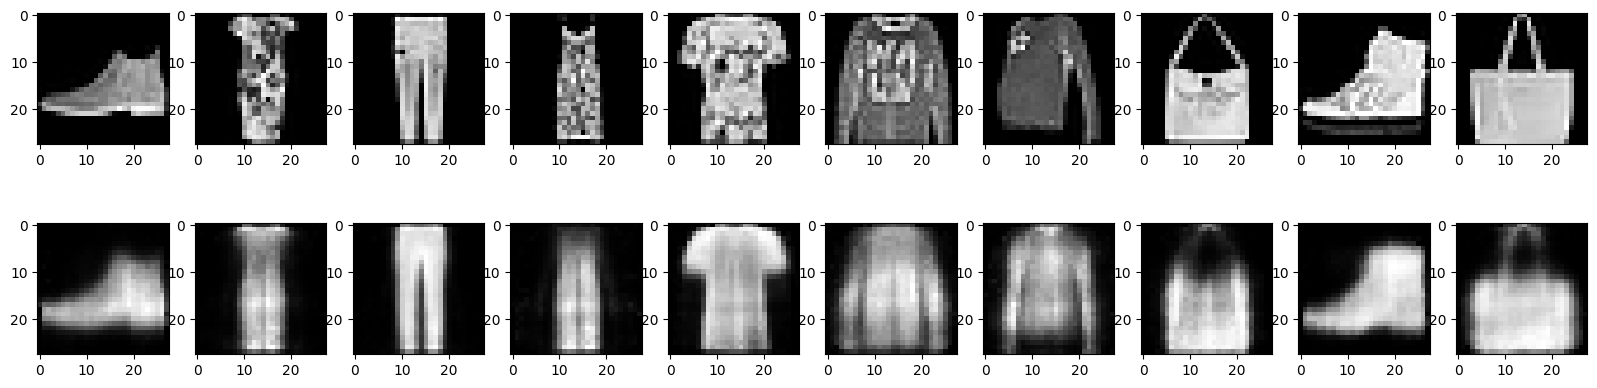

In [14]:
n = 10
plt.figure(figsize=(20,5))

for i in range(n):
  ax = plt.subplot(2, 10, i + 1)
  test_img = image[i*100].to(device)
  plt.imshow(test_img.cpu(), cmap='gray')

  ax = plt.subplot(2, 10, i+1+n)
  recon_image = test_recon_x.data[i*100].reshape(28, 28)
  plt.imshow(recon_image.cpu(),cmap='gray')

In [38]:
# Practice 6-2. MNIST Generation - Variational Autoencoder(VAE)

In [16]:
# Import package

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
# GPU/CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

cuda


In [18]:
# import dataset

fashion_train = datasets.FashionMNIST("../image_data/FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
fashion_test = datasets.FashionMNIST("../image_data/FashionMNIST", train=False, download=True, transform=transforms.ToTensor())

fashion_train.data = fashion_train.data/255.0
fashion_train.targets = fashion_train.targets
fashion_test.data = fashion_test.data/255.0
fashion_test.targets = fashion_test.targets

tensor(0)


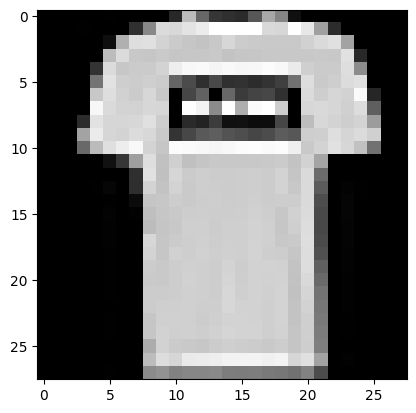

In [19]:
# import dataset

plt.imshow(fashion_train.data[1], cmap="gray")
print(fashion_train.targets[1])

In [20]:
# Batch generation

batch_size = 256

train_loader = torch.utils.data.DataLoader(fashion_train.data, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = torch.utils.data.DataLoader(fashion_train.data, batch_size=len(fashion_test.data), shuffle=False, drop_last=False)

In [28]:
# Model

class VAE(nn.Module):
  def __init__(self):
    super(VAE, self).__init__()

    self.fc1 = nn.Linear(784, 400)
    self.mu = nn.Linear(400, 20)
    self.logvar = nn.Linear(400, 20)
    self.fc2 = nn.Linear(20, 400)
    self.fc3 = nn.Linear(400, 784)

  def encode(self, x):
    h1 = F.relu(self.fc1(x))
    mu = self.mu(h1)
    logvar = self.logvar(h1)

    return mu, logvar

  def reparameterize(self, mu_vector, logvar_vector):
    var_vector = torch.exp(logvar_vector)
    std = torch.sqrt(var_vector)
    eps = torch.randn_like(std)
    z_vector = mu_vector + eps.mul(std)

    return z_vector

  def decode(self, z):
    h2 = F.relu(self.fc2(z))
    Bernouhlli_p = torch.sigmoid(self.fc3(h2))

    return Bernouhlli_p

  def forward(self, x):
    mu, logvar = self.encode(x)
    z = self.reparameterize(mu, logvar)
    Bernouhlli_p = self.decode(z)

    return Bernouhlli_p, mu, logvar

In [29]:
model = VAE().to(device)

In [30]:
# Parameter, loss function, optimizer

def loss_function(recon_x, x, mu, logvar):
  Bernouhlli_loss = F.binary_cross_entropy(recon_x, x.reshape(-1, 784), reduction='sum')
  KL_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

  return Bernouhlli_loss + KL_divergence

In [31]:
# Hyperparameters

num_epochs = 10
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
# Model Train

loss_list = []

for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, images in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)

    images = images.to(device)
    input_image = images.reshape(-1, 28*28)
    optimizer.zero_grad()
    recon_x, mu, logvar = model(input_image)
    loss = loss_function(recon_x, input_image, mu, logvar)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 77508.685530
Epoch 2 Loss 67112.773562
Epoch 3 Loss 65278.708195
Epoch 4 Loss 64302.099219
Epoch 5 Loss 63696.483452
Epoch 6 Loss 63243.386054
Epoch 7 Loss 62960.947931
Epoch 8 Loss 62718.255170
Epoch 9 Loss 62541.888198
Epoch 10 Loss 62389.932247


In [35]:
# Test

for batch_idx, label in enumerate(test_loader):
  with torch.no_grad():
    test_img = image.to(device)
    test_img = test_img.reshape(-1, 28*28)
    test_recon_x, _, _ = model(test_img)

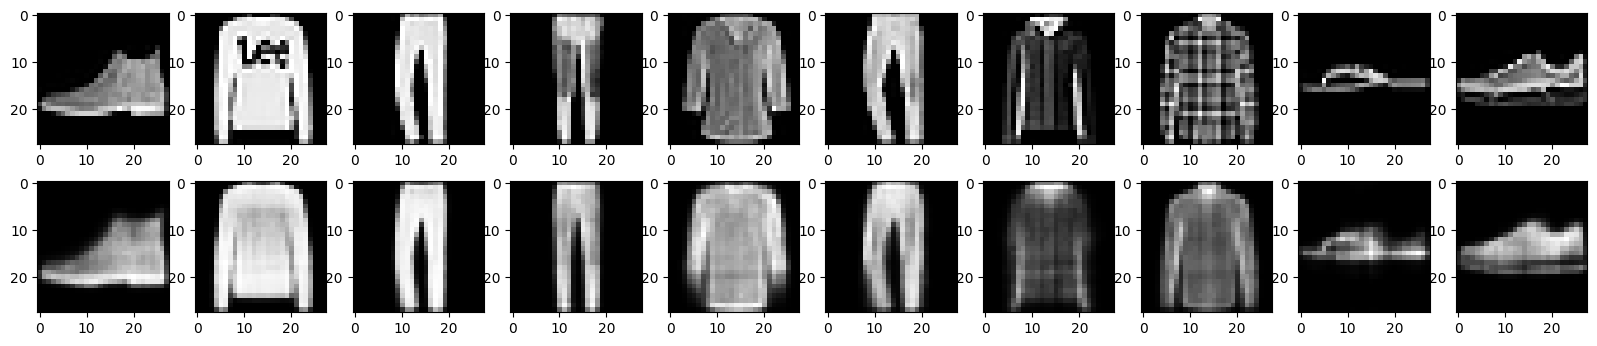

In [36]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, 10, i+1)
  image = test_img[i].reshape(28, 28)
  plt.imshow(image.cpu(), cmap = 'gray')

  ax = plt.subplot(2, 10, i+1+n)
  recon_image = test_recon_x.data[i].cpu().reshape(28, 28)
  plt.imshow(recon_image, cmap='gray')

In [40]:
# Practice 6-3. MNIST Generation - Variational Autoencoder(VAE)

In [41]:
# Import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [42]:
# GPU/CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

cuda


In [44]:
# Import dataset

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35555491.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1111622.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9669140.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 13012656.26it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [46]:
# Batch generation

batch_size = 256

train_loader = DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)

In [47]:
# Model

class VAE(nn.Module):
  def __init__(self):
    super(VAE, self).__init__()

    self.fc1 = nn.Linear(784, 400)
    self.mu = nn.Linear(400, 20)
    self.logvar = nn.Linear(400, 20)
    self.fc2 = nn.Linear(20, 400)
    self.fc3 = nn.Linear(400, 784)

  def encode(self, x):
    h1 = F.relu(self.fc1(x))
    mu = self.mu(h1)
    logvar = self.logvar(h1)

    return mu, logvar

  def reparameterize(self, mu_vector, logvar_vector):
    var_vector = torch.exp(logvar_vector)
    std = torch.sqrt(var_vector)
    eps = torch.randn_like(std)
    z_vector = mu_vector + eps.mul(std)

    return z_vector

  def decode(self, z):
    h2 = F.relu(self.fc2(z))
    Bernouhlli_p = torch.sigmoid(self.fc3(h2))

    return Bernouhlli_p

  def forward(self, x):
    mu, logvar = self.encode(x)
    z = self.reparameterize(mu, logvar)
    Bernouhlli_p = self.decode(z)

    return Bernouhlli_p, mu, logvar

In [48]:
model = VAE().to(device)

In [52]:
# Parameter, loss function, optimizer

def loss_function(recon_x, x, mu, logvar):
  Bernouhlli_loss = F.binary_cross_entropy(recon_x, x.reshape(-1, 784), reduction='sum')
  KL_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

  return Bernouhlli_loss + KL_divergence

In [53]:
# Hyperparameters

num_epochs = 10
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [54]:
# Model train

loss_list = []

for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, (images, label) in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)

    images = images.to(device)
    input_image = images.reshape(-1, 28*28)
    optimizer.zero_grad()
    recon_x, mu, logvar = model(input_image)
    loss = loss_function(recon_x, input_image, mu, logvar)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 48340.363946
Epoch 2 Loss 33808.483768
Epoch 3 Loss 30776.886461
Epoch 4 Loss 29546.870811
Epoch 5 Loss 28884.140421
Epoch 6 Loss 28430.356325
Epoch 7 Loss 28134.798429
Epoch 8 Loss 27884.508914
Epoch 9 Loss 27699.012076
Epoch 10 Loss 27538.305560


In [55]:
# Test

for batch_size, (image, label) in enumerate(test_loader):
  with torch.no_grad():
    test_img = image.to(device)
    test_img = test_img.reshape(-1, 28*28)
    test_recon_x, _, _ = model(test_img)

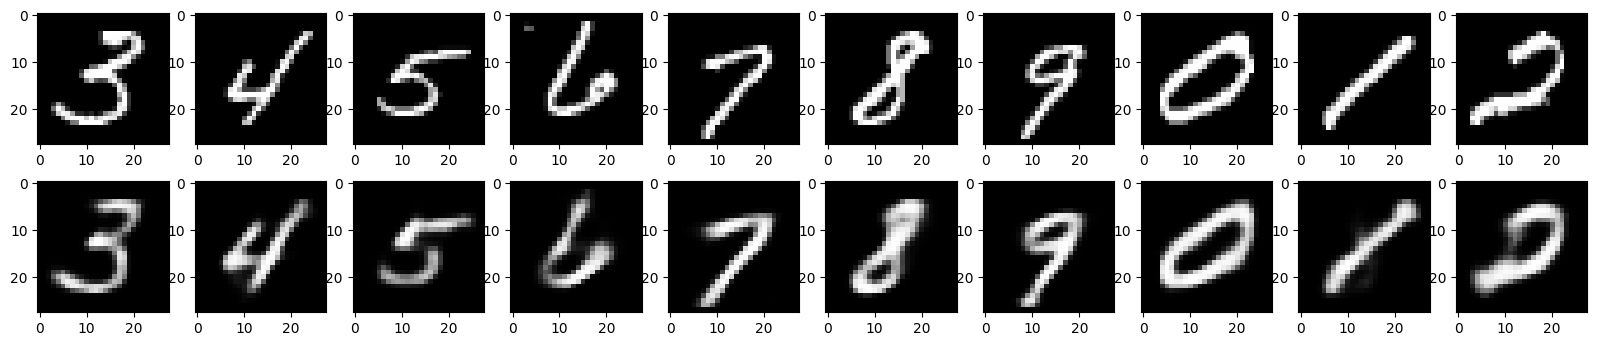

In [57]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, 10, i+1)
  image = test_img[i].reshape(28, 28)
  plt.imshow(image.cpu(), cmap='gray')

  ax = plt.subplot(2, 10, i+1+n)
  recon_image = test_recon_x.data[i].cpu().reshape(28, 28)
  plt.imshow(recon_image, cmap='gray')